<center><h1> A guide to recognizing specific psychological labels from text using ML(machine learning) and AI (artificial intelligence) </h1></center>

# 1. Loading data and EDA

EDA (Exploratory Data Analysis) is extremely important because text data is often messy, inconsistent, and unstructured. Before you can build or train any NLP model, you must understand and clean your data — and that’s exactly what EDA helps with.

EDA in NLP = understanding your text before teaching a machine to read it.


EDA is like looking at a map before a road trip. You check the route, see if there are any roadblocks (missing data), and make sure you're going to the right city (solving the right problem). If you just start driving without looking, you'll probably get lost!

- Import main liberaries in python
- Load and Reading dataset
- Cleaning data
- Visualizing dataset
- Export cleaned daaset as a new CSV file
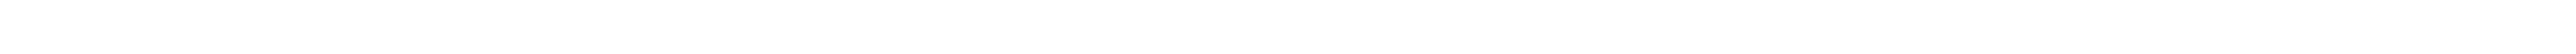
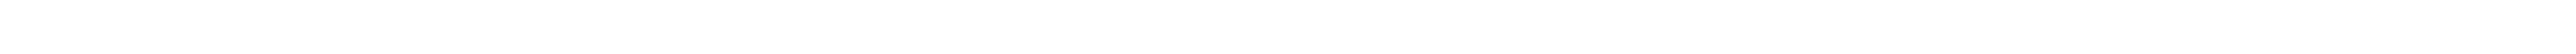
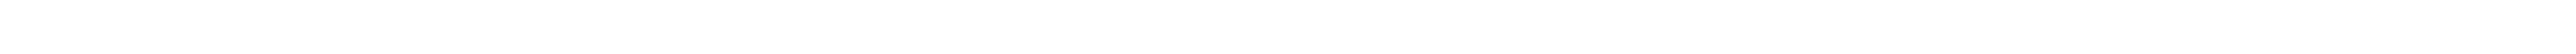
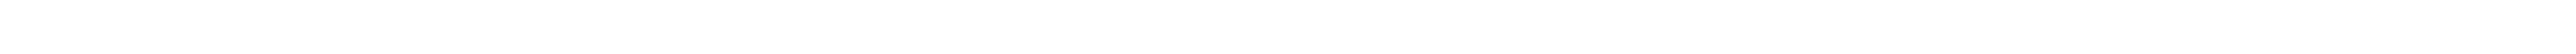

## Main liberaries in python

A library in Python is a collection of pre-written code (modules and packages) that you can use to perform common tasks — so you don’t have to write everything from scratch.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""================================
If the dataset is exist in your
computer or drive, you
 can use this method.
================================"""
#path = "C:\Users\...\..."
#filename = "Suicide_Detection.csv"


"""================================
If the dataset is exist in some
 platforms like kagglehub, you
 can use this method.
================================"""
import kagglehub
path = kagglehub.dataset_download("nikhileswarkomati/suicide-watch")
filename = "Suicide_Detection.csv"

In [3]:
df = pd.read_csv(f"{path}/{filename}")
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


## Data cleaning

If we feed the computer messy data (with typos, symbols, and inconsistencies), it gets "confused" and makes a lot of mistakes.

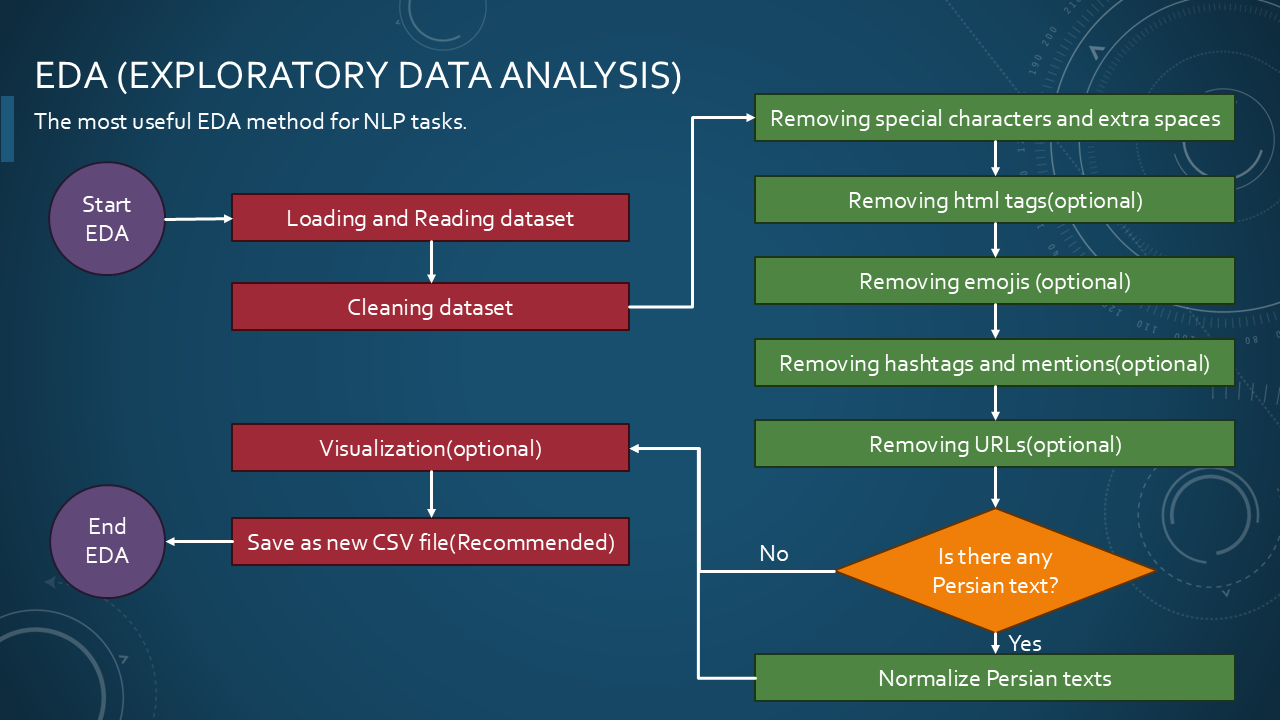
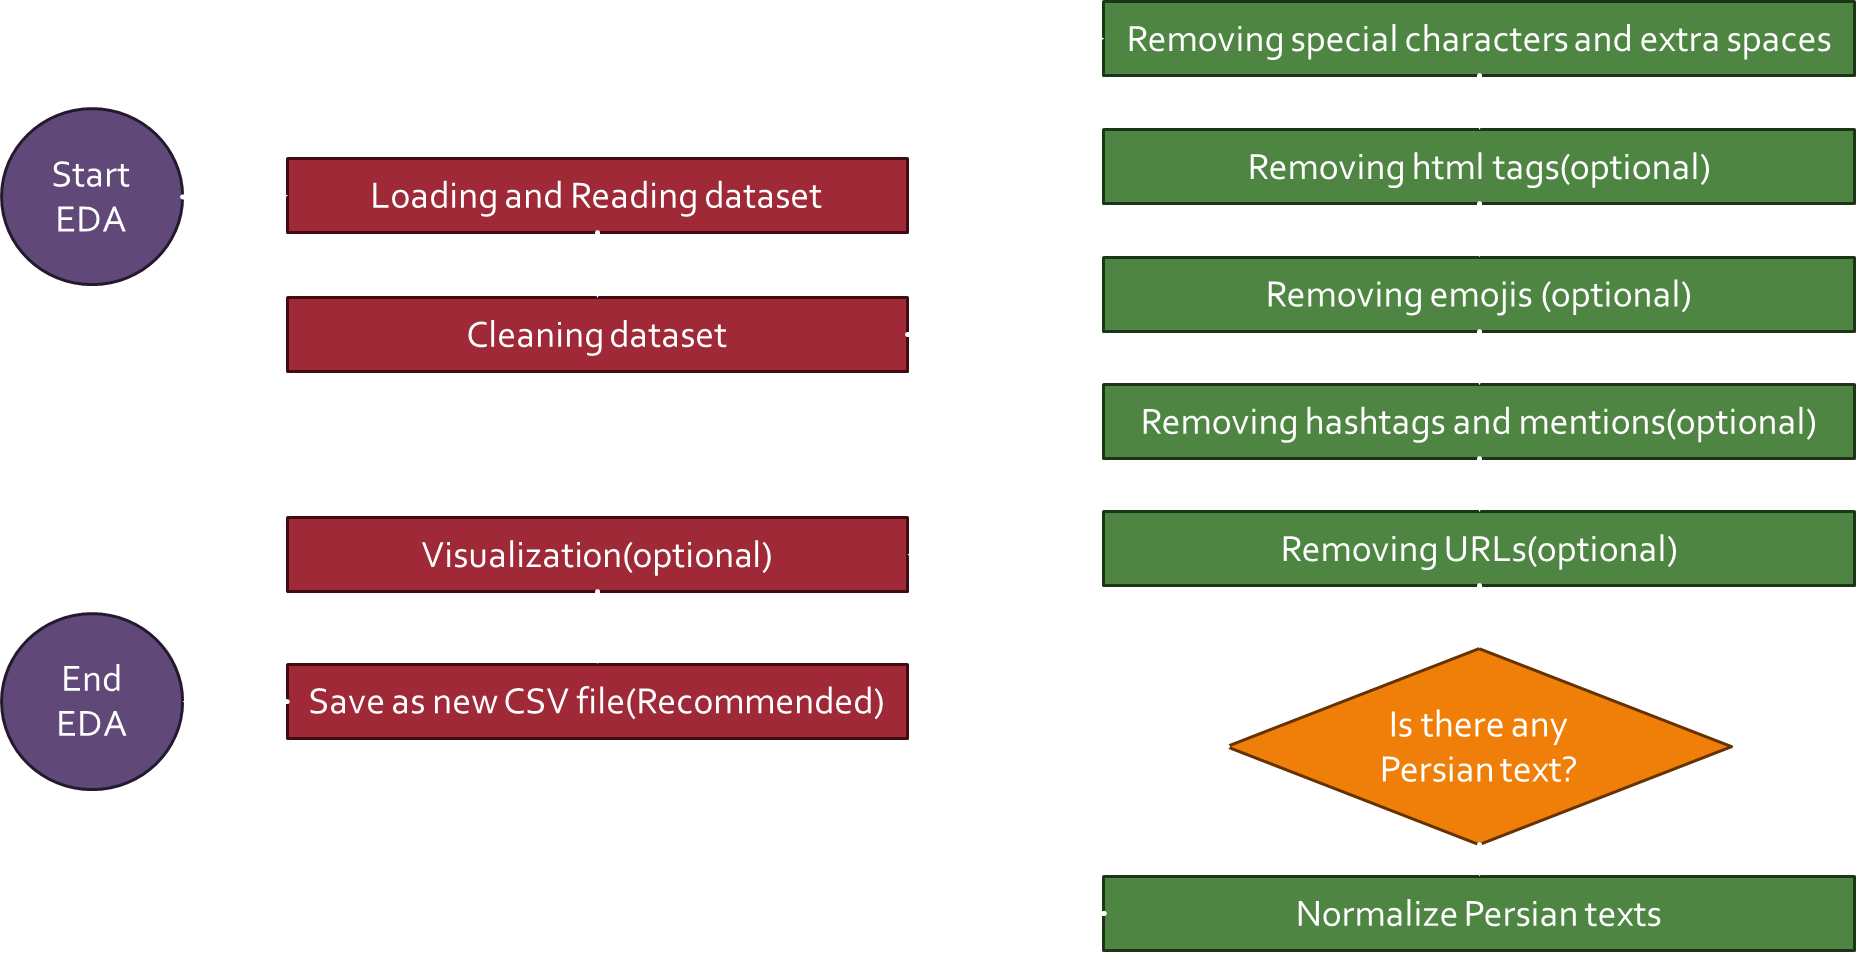
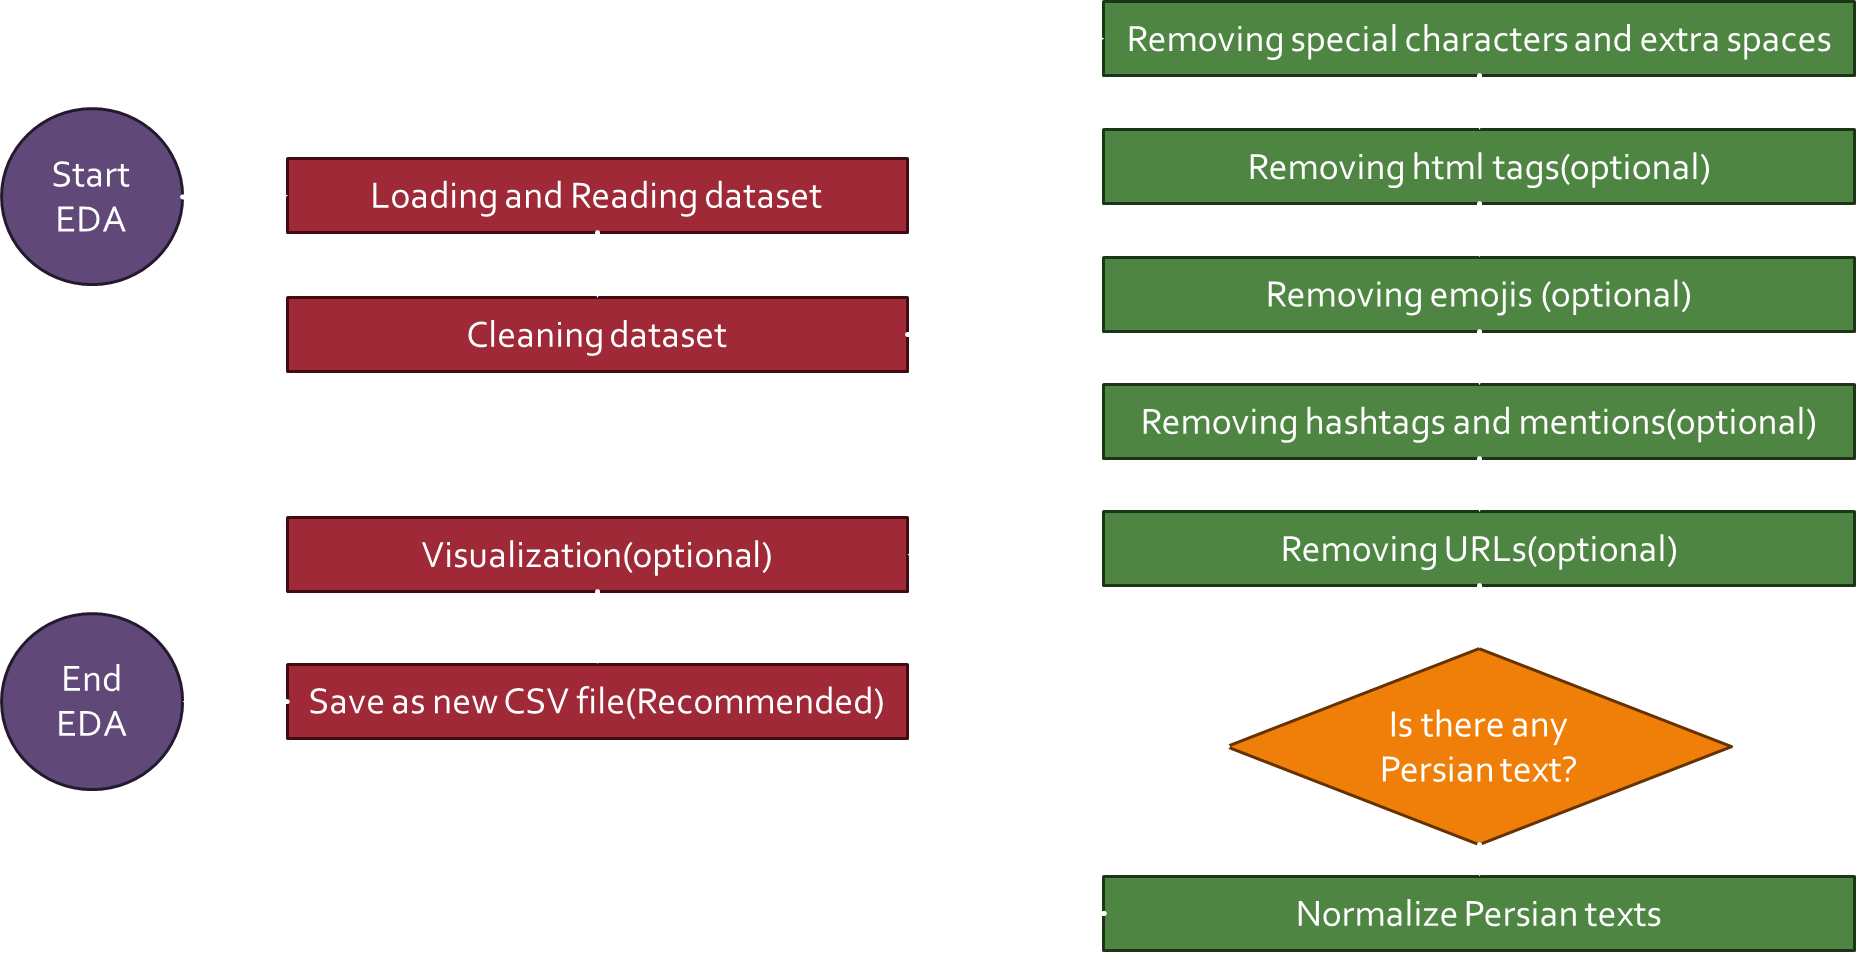

In [4]:
import string
from collections import Counter, defaultdict
import emoji
from bidi.algorithm import get_display
import html

def clean_text_basic(text):
    """
    Clear text base
    """
    if not isinstance(text, str):
        return ""

    text = text.lower()

    # removing special characters
    text = re.sub(r'[^\w\s\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF]', ' ', text)

    # removing extra spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove spaces from the beginning and end
    text = text.strip()

    return text

def normalize_persian_text(text):
    """
    Normaliation
    """
    # Nrmalize spaces and half-spaces(specialyy in persian texts)
    text = re.sub(r'[‌\u200c]', ' ', text)  # hlf-space -> normal space


    # Standardization of Persian letters
    text = text.replace('ي', 'ی')
    text = text.replace('ك', 'ک')
    text = text.replace('ة', 'ه')

    # حذف اعراب
    text = re.sub(r'[\u064B-\u065F]', '', text)  # Removing vowels
    return text

def remove_extra_whitespace(text):
    """
    Remove extra spaces
    """
    text = re.sub(r'\s+', ' ', text)  # Replacing multiple spaces with a single space
    text = re.sub(r'^\s+|\s+$', '', text)  # Remove spaces from the beginning and end
    return text

def remove_html_tags(text):
    """
    Removing html tags
    """
    return re.sub(r'<[^>]+>', '', text)

def remove_urls(text):
    """
    Removing urls
    """
    return re.sub(r'http\S+|www\.\S+', '', text)

def remove_emails(text):
    """
    Removing E-mails
    """
    return re.sub(r'\S+@\S+', '', text)

def remove_mentions_hashtags(text):
    """
    Removing mentions and hashtags
    """
    text = re.sub(r'@\w+', '', text)  # حذف mentions
    text = re.sub(r'#\w+', '', text)  # حذف hashtags
    return text

def remove_numbers(text, replace_with=''):
    """
    Replacing numbers
    """
    return re.sub(r'\d+', replace_with, text)

def remove_emoji(text):
    """
    Removing Emojies
    """
    return emoji.replace_emoji(text, replace='')

def correct_persian_spacing(text):
    """
    Correcting spacing in Persian text
    """
    # حرف اضافه‌های فارسی که باید به کلمه قبل بچسبند
    attached_prefixes = ['از', 'به', 'در', 'با', 'بر', 'برای', 'تا', 'بی', 'غیر']

    # حروف ربط که باید به کلمه بعد بچسبند
    attached_suffixes = ['ها', 'های', 'ترین', 'تری', 'ام', 'ات', 'اش']

    words = text.split()
    corrected_words = []

    for i, word in enumerate(words):
        if i > 0 and any(word.startswith(prefix) for prefix in attached_prefixes):
            corrected_words[-1] = corrected_words[-1] + ' ' + word
        elif i < len(words) - 1 and any(words[i+1].startswith(suffix) for suffix in attached_suffixes):
            corrected_words.append(word + ' ' + words[i+1])
        else:
            corrected_words.append(word)

    return ' '.join(corrected_words)

def advanced_text_cleaning(text, cleaning_options=None):
    """
    Advanced text cleaning with configurable options
    """
    if cleaning_options is None:
        cleaning_options = {
            'remove_html': True,
            'remove_urls': True,
            'remove_emails': True,
            'remove_mentions_hashtags': True,
            'remove_numbers': True,
            'remove_emoji': True,
            'normalize_persian': True,
            'correct_spacing': True,
            'remove_extra_whitespace': True
        }

    if not isinstance(text, str):
        return ""

    # Apply cleaning steps based on options
    if cleaning_options.get('remove_html', True):
        text = remove_html_tags(text)

    if cleaning_options.get('remove_urls', True):
        text = remove_urls(text)

    if cleaning_options.get('remove_emails', True):
        text = remove_emails(text)

    if cleaning_options.get('remove_mentions_hashtags', True):
        text = remove_mentions_hashtags(text)

    if cleaning_options.get('remove_numbers', True):
        text = remove_numbers(text)

    if cleaning_options.get('remove_emoji', True):
        text = remove_emoji(text)

    # Base cleaning
    text = clean_text_basic(text)

    if cleaning_options.get('normalize_persian', True):
        text = normalize_persian_text(text)

    if cleaning_options.get('correct_spacing', True):
        text = correct_persian_spacing(text)

    if cleaning_options.get('remove_extra_whitespace', True):
        text = remove_extra_whitespace(text)

    return text

# تابع اصلی برای پاکسازی و ارزیابی
def clean_and_evaluate_dataset(df, text_column, label_column, cleaning_options=None):

    print("Cleaning is started")

    df_clean = df.copy()

    df_clean['original_text'] = df_clean[text_column]

    df_clean['cleaned_text'] = df_clean[text_column].apply(
        lambda x: advanced_text_cleaning(x, cleaning_options)
    )

    original_lengths = df_clean['original_text'].str.len()
    cleaned_lengths = df_clean['cleaned_text'].str.len()

    print(f"Numbe of samples: {len(df_clean)}")
    print(f"Mean length of texts: {original_lengths.mean():.2f}")
    print(f"Mean length of cleaned texts: {cleaned_lengths.mean():.2f}")
    print(f"diff: {(cleaned_lengths.mean() - original_lengths.mean()):.2f}")

    print("\nSample of cleaning:")
    print("Orginal text:", df_clean['original_text'].iloc[0][:100] + "...")
    print("Cleaned text:", df_clean['cleaned_text'].iloc[0][:100] + "...")

    return df_clean


In [5]:
if __name__ == "__main__":
    df = df

    cleaning_config = {
      'remove_html': True,
      'remove_urls': True,
      'remove_emails': True,
      'remove_mentions_hashtags': False,
      'remove_numbers': False,
      'remove_emoji': False,
      'normalize_persian': False,
      'correct_spacing': True,
      'remove_extra_whitespace': True
    }

    # cleaning
    df_cleaned = clean_and_evaluate_dataset(
        df=df,
        text_column='text',
        label_column='class',
        cleaning_options=cleaning_config
    )


Cleaning is started
Numbe of samples: 232074
Mean length of texts: 689.64
Mean length of cleaned texts: 662.96
diff: -26.68

Sample of cleaning:
Orginal text: Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and ...
Cleaned text: ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and ...


In [6]:
df_cleaned.head()

,Unnamed: 0,text,class,original_text,cleaned_text
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don t get affected by compliments...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,Finally 2020 is almost over... So I can never ...,finally 2020 is almost over so i can never hea...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,"I’m so lostHello, my name is Adam (16) and I’v...",i m so losthello my name is adam 16 and i ve b...


In [7]:
# Save DataFrame to Kaggle's output directory
df_cleaned.to_csv('/kaggle/working/cleaned_dataset.csv', index=False)

# Toenizing

In [8]:
def char_ngram_tokenizer(text, n=3):
    tokens = []
    for word in re.findall(r"\S+", text):
        w = f"<{word}>"
        if len(w) <= n:
            tokens.append(w)
        else:
            for i in range(len(w) - n + 1):
                tokens.append(w[i:i+n])
    return tokens

In [9]:
def whitespace_tokenizer(text):
    return text.split()

In [10]:
print("Tokenizing is started")

df_tokenized = df_cleaned.copy()

text_column='cleaned_text'
df_tokenized['class'] = df_tokenized['class'].map({'suicide': 1, 'non-suicide': 0})

df_tokenized['whitespace_tokenizer'] = df_tokenized[text_column].apply(
    lambda x: whitespace_tokenizer(x)
)

Tokenizing is started


In [11]:
df_tokenized = df_tokenized.drop(['original_text', 'cleaned_text', 'text', 'Unnamed: 0'], axis=1)

In [12]:
df_tokenized.head()

,class,whitespace_tokenizer
0,1,"[ex, wife, threatening, suiciderecently, i, le..."
1,0,"[am, i, weird, i, don, t, get, affected, by, c..."
2,0,"[finally, 2020, is, almost, over, so, i, can, ..."
3,1,"[i, need, helpjust, help, me, im, crying, so, ..."
4,1,"[i, m, so, losthello, my, name, is, adam, 16, ..."


In [13]:
# Save DataFrame to Kaggle's output directory
df_tokenized.to_csv('/kaggle/working/toenized_dataset.csv', index=False)

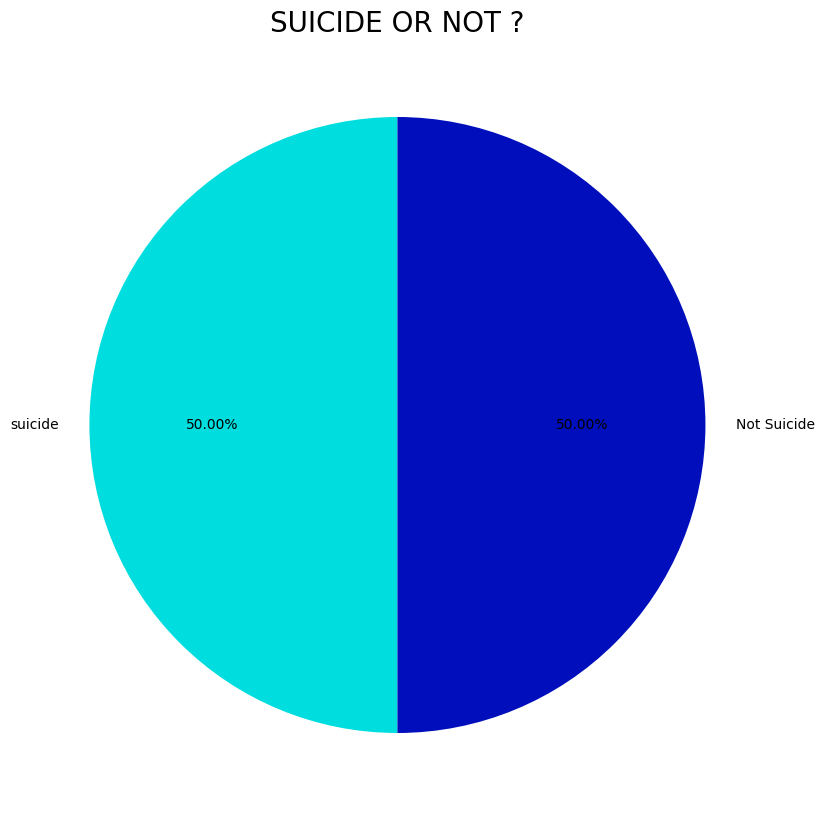

In [14]:
plt.figure(figsize=(12,10))
plt.pie(df_tokenized['class'].value_counts(),startangle=90,colors=['#00dddf','#000fbb'],
        autopct='%0.2f%%',labels=['suicide','Not Suicide'])
plt.title('SUICIDE OR NOT ?',fontdict={'size':20})
plt.show()

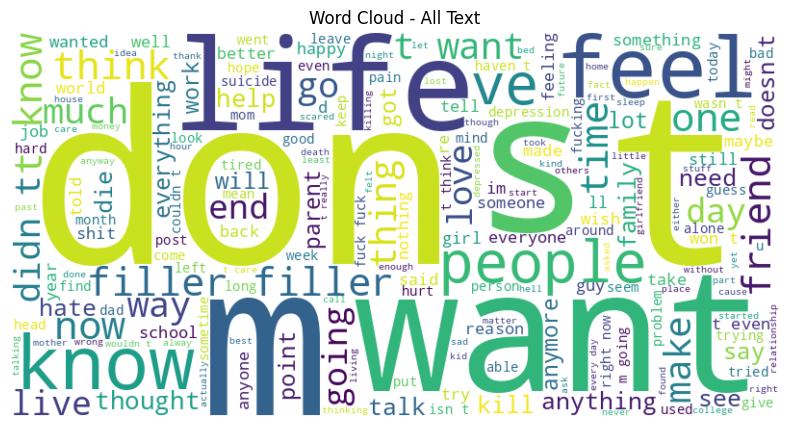

In [15]:
from wordcloud import WordCloud

# Join all token_text into one string
all_text = ' '.join(df_tokenized['whitespace_tokenizer'].astype(str).str.strip('[]').str.replace("'", ""))

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - All Text')
plt.show()

# Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

## TF-IDF Vectorizer: Complete Guide

### What is TF-IDF?

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. It's one of the most fundamental techniques in NLP for converting text into numerical features.

### How TF-IDF Works?

#### 1. Term Frequency (TF)
Measures how frequently a term appears in a document.

$$TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)$$


#### 2. Inverse Document Frequency (IDF)
Measures how important a term is across all documents.

$$IDF(t, D) = log(Total number of documents in corpus D / Number of documents containing term t)$$

#### 3. TF-IDF Formula
The final TF-IDF score is the product of TF and IDF:
$$TF-IDF(t, d, D) = TF(t, d) × IDF(t, D)$$

### Mathematical Formula


**TF-IDF Formula**
$$TF-IDF(t, d, D) = TF(t, d) × IDF(t, D)$$


**Where:**
- `TF(t, d) = freq(t, d) / |d|`
- `IDF(t, D) = log(|D| / |{d ∈ D : t ∈ d}|)`
- `t` = term (word)
- `d` = document
- `D` = corpus (collection of documents)
- `|d|` = total terms in document d
- `|D|` = total documents in corpus

</div>

## Simple Example

Let's consider 3 documents:

- **Doc1**: "the cat sat on the mat"
- **Doc2**: "the dog played with the cat"
- **Doc3**: "the bird flew away"

**For word "cat" in Doc1:**
- `TF("cat", Doc1) = 1/6 = 0.167`
- `IDF("cat", D) = log(3/2) = 0.405`
- `TF-IDF = 0.167 × 0.405 = 0.068`

**For word "the" in Doc1:**
- `TF("the", Doc1) = 2/6 = 0.333`
- `IDF("the", D) = log(3/3) = 0`
- `TF-IDF = 0.333 × 0 = 0`

## Why TF-IDF is Important

### 1. Handles Common Words
- Words like "the", "is", "and" get low scores
- Domain-specific words get higher scores

### 2. Document Similarity
- Enables measuring how similar documents are
- Foundation for search engines and recommendation systems

### 3. Feature Engineering
- Converts text into meaningful numerical features
- Better than simple word counts for machine learning

### 4. Search Relevance
- Helps search engines rank documents by relevance
- Important terms get higher weights

In [17]:
# Preprocess the token_text column
def preprocess_tokens(text_series):
    """Convert token_text list to string"""
    return text_series.astype(str).str.strip('[]').str.replace("'", "")

# Prepare the data
df_tokenized['processed_text'] = preprocess_tokens(df_tokenized['whitespace_tokenizer'])


# Encode the target variable
le = LabelEncoder()
df_tokenized['encoded_class'] = le.fit_transform(df_tokenized['class'])

print("Class mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {i}")



# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(
    max_features=1000,  # Use top 1000 features
    stop_words='english',
    ngram_range=(1, 2)  # Use both unigrams and bigrams
)

X = vectorizer.fit_transform(df_tokenized['processed_text']).toarray()
y = df_tokenized['encoded_class']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable distribution:\n{df_tokenized['class'].value_counts()}")

Class mapping:
0: 0
1: 1
Feature matrix shape: (232074, 1000)
Target variable distribution:
class
1    116037
0    116037
Name: count, dtype: int64


### Split the dataset to train and evaluate the model

In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 185659
Test set size: 46415


In [19]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)
print('Training score:',VotingClassifiers.score(X_train, y_train))
print('Testing score:',VotingClassifiers.score(X_test,y_test))

Training score: 0.8721311652007174
Testing score: 0.8724981148335668


              precision    recall  f1-score   support

           0       0.92      0.82      0.87     23208
           1       0.84      0.93      0.88     23207

    accuracy                           0.87     46415
   macro avg       0.88      0.87      0.87     46415
weighted avg       0.88      0.87      0.87     46415



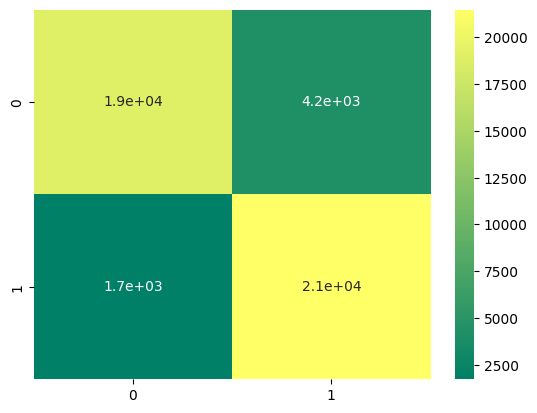

In [20]:
y_act=y_test
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

## Test case

In [21]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
def preprocess(inp):
    inp = inp.lower() #convert to lower case 
    inp = inp.replace(r'[^\w\s]+', '') #remove punctuations
    inp = [word for word in inp.split() if word not in (stop_words)] #tokenize the sentence
    inp = ' '.join([ps.stem(i) for i in inp]) #stremming
    inputToModel = vectorizer.transform([inp]).toarray() #transform to vector form
    return inputToModel

In [23]:
def app(input_text):
    # Define the input text box
    print('Input : ',input_text) #take input from user
    processed_array = preprocess(input_text) #preprocess the text 
    predict = VotingClassifiers.predict(processed_array) #Model prediction
    print('Output : ', predict[0])

In [31]:
app("I can't go on anymore. I'm tired and I want to disappear forever.")
app("I had a great day today and I got everything done on time.")
app("I'd better make dinner so I can get to my lessons later.")
app("I wish I never existed. Life is empty and meaningless.")

Input :  I can't go on anymore. I'm tired and I want to disappear forever.
Output :  1
Input :  I had a great day today and I got everything done on time.
Output :  0
Input :  I'd better make dinner so I can get to my lessons later.
Output :  0
Input :  I wish I never existed. Life is empty and meaningless.
Output :  1


# Federated Learning

In [25]:
from sklearn.model_selection import StratifiedKFold
from copy import deepcopy

In [26]:
n_clients = 20
random_state = 42

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def split_stratified_into_clients(X, y, n_clients, random_state=42):
    """
    Returns list of (X_part, y_part) for each client.
    Works whether X/y are numpy arrays, pandas objects, or sparse matrices.
    """
    # Convert y to a 1-D array for stratification (but keep original for slicing)
    y_for_split = np.asarray(y).ravel()

    skf = StratifiedKFold(n_splits=n_clients, shuffle=True, random_state=random_state)
    client_slices = []
    for _, client_idx in skf.split(np.zeros(len(y_for_split)), y_for_split):
        # client_idx are positional indices; extract rows/labels by position
        # For X:
        if hasattr(X, "iloc"):            # pandas DataFrame
            X_client = X.iloc[client_idx]
        else:
            # works for numpy arrays, scipy sparse, etc.
            try:
                X_client = X[client_idx]
            except Exception:
                # as a last resort use np.take (works on arrays)
                X_client = np.take(X, client_idx, axis=0)

        # For y:
        if isinstance(y, pd.Series) or isinstance(y, pd.DataFrame):
            y_client = y.iloc[client_idx].values.ravel()
        else:
            # numpy array or list
            try:
                y_client = y[client_idx]
            except Exception:
                y_client = np.take(y_for_split, client_idx, axis=0)

        client_slices.append((X_client, y_client))
    return client_slices


clients = split_stratified_into_clients(X_train, y_train, n_clients=n_clients, random_state=42)
print(f"Created {len(clients)} clients. Example client sizes: {[len(c[1]) for c in clients]}")

# -------------------------
# Train local models on each client
# -------------------------
client_models = []

for i, (Xc, yc) in enumerate(clients):
    # local base estimators:
    nb = GaussianNB()
    nb2 = BernoulliNB()
    nb3 = MultinomialNB()
    local_vc = VotingClassifier(
        estimators=[('GaussianNB', nb), ('BernoulliNB', nb2), ('MultinomialNB', nb3)],
        voting='soft'  # we need predict_proba for aggregation
    )

    # fit local model (note: GaussianNB expects dense arrays)
    try:
        local_vc.fit(Xc, yc)
    except Exception as e:
        # If Xc is sparse and causes issues with GaussianNB, densify just for that learner:
        # fallback: convert to dense arrays for this client's fit
        print(f"Client {i}: fit raised {e!r}. Converting to dense for fit.")
        Xc_dense = np.asarray(Xc.todense()) if hasattr(Xc, "todense") else np.asarray(Xc)
        local_vc.fit(Xc_dense, yc)

    client_models.append(local_vc)
    print(f"Trained client {i} model on {len(yc)} samples.")

# -------------------------
# Server aggregation via averaging probabilities
# -------------------------
def aggregate_predict_proba(client_models, X_eval):
    """
    For each client model, get predict_proba(X_eval) and average across clients.
    Returns averaged_probs (n_samples x n_classes).
    """
    n_clients = len(client_models)
    # ensure X_eval in suitable format for clients that need dense input
    # We'll attempt predict_proba; if it fails due to sparse input, convert to dense for that client.
    probs_sum = None
    for i, model in enumerate(client_models):
        try:
            probs = model.predict_proba(X_eval)
        except Exception:
            X_eval_dense = np.asarray(X_eval.todense()) if hasattr(X_eval, "todense") else np.asarray(X_eval)
            probs = model.predict_proba(X_eval_dense)
        if probs_sum is None:
            probs_sum = probs
        else:
            probs_sum += probs
    avg_probs = probs_sum / n_clients
    return avg_probs

Created 20 clients. Example client sizes: [9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9283, 9282]
Trained client 0 model on 9283 samples.
Trained client 1 model on 9283 samples.
Trained client 2 model on 9283 samples.
Trained client 3 model on 9283 samples.
Trained client 4 model on 9283 samples.
Trained client 5 model on 9283 samples.
Trained client 6 model on 9283 samples.
Trained client 7 model on 9283 samples.
Trained client 8 model on 9283 samples.
Trained client 9 model on 9283 samples.
Trained client 10 model on 9283 samples.
Trained client 11 model on 9283 samples.
Trained client 12 model on 9283 samples.
Trained client 13 model on 9283 samples.
Trained client 14 model on 9283 samples.
Trained client 15 model on 9283 samples.
Trained client 16 model on 9283 samples.
Trained client 17 model on 9283 samples.
Trained client 18 model on 9283 samples.
Trained client 19 model on 9282 samples.


In [28]:
# Evaluate aggregated model on X_test
avg_probs_test = aggregate_predict_proba(client_models, X_test)
y_pred_aggregated = np.argmax(avg_probs_test, axis=1)

print("\n=== Aggregated server model (averaging client probabilities) ===")
acc_agg = accuracy_score(y_test, y_pred_aggregated)
print(f"Aggregated model accuracy: {acc_agg:.4f}")
print("Classification report (aggregated):")
print(classification_report(y_test, y_pred_aggregated))
print("Confusion matrix (aggregated):")
print(confusion_matrix(y_test, y_pred_aggregated))


=== Aggregated server model (averaging client probabilities) ===
Aggregated model accuracy: 0.8853
Classification report (aggregated):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     23208
           1       0.88      0.90      0.89     23207

    accuracy                           0.89     46415
   macro avg       0.89      0.89      0.89     46415
weighted avg       0.89      0.89      0.89     46415

Confusion matrix (aggregated):
[[20297  2911]
 [ 2414 20793]]


              precision    recall  f1-score   support

           0       0.89      0.87      0.88     23208
           1       0.88      0.90      0.89     23207

    accuracy                           0.89     46415
   macro avg       0.89      0.89      0.89     46415
weighted avg       0.89      0.89      0.89     46415



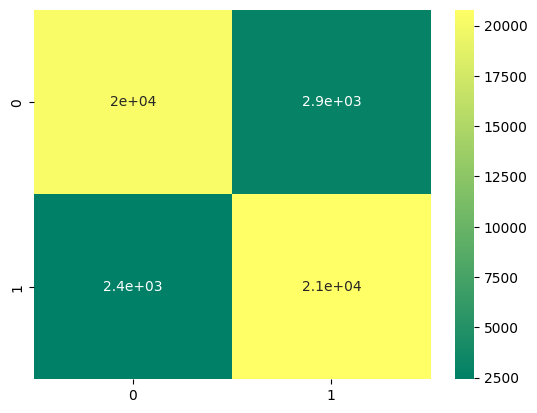

In [29]:
y_act=y_test
sns.heatmap(confusion_matrix(y_act,y_pred_aggregated),annot=True,cmap='summer')
print(classification_report(y_act,y_pred_aggregated))

In [30]:
counter = 0
for apt in avg_probs_test:
    print("{} ---> {}".format(avg_probs_test[counter], y_pred_aggregated[counter]))
    counter = counter+1
    if counter>10:
        break


[0.47739365 0.52260635] ---> 1
[0.46379246 0.53620754] ---> 1
[0.05131144 0.94868856] ---> 1
[0.12289521 0.87710479] ---> 1
[0.01622687 0.98377313] ---> 1
[0.64241893 0.35758107] ---> 0
[0.16026026 0.83973974] ---> 1
[0.96806217 0.03193783] ---> 0
[0.41473713 0.58526287] ---> 1
[0.93230706 0.06769294] ---> 0
[0.10883771 0.89116229] ---> 1
